In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns

house_df = pd.read_csv('kc_house_data.csv')

## Exercise 1
a) Create and train simple regression model of sqft_living to price.  
b) Evaluate and visualise created model.  
c) Create and plot higher order polynomial regression models.

In [55]:
#a)

X = house_df.sqft_living.values.reshape(-1,1)[:1000]
y = house_df.price.values.reshape(-1)[:1000]


model = LinearRegression() 

#Your code:
model.fit(X, y)

[[1180]
 [2570]
 [ 770]
 [1960]
 [1680]
 [5420]
 [1715]
 [1060]
 [1780]
 [1890]
 [3560]
 [1160]
 [1430]
 [1370]
 [1810]
 [2950]
 [1890]
 [1600]
 [1200]
 [1250]
 [1620]
 [3050]
 [2270]
 [1070]
 [2450]
 [1710]
 [2450]
 [1400]
 [1520]
 [2570]
 [2320]
 [1190]
 [2330]
 [1090]
 [2060]
 [2300]
 [1660]
 [2360]
 [1220]
 [2620]
 [2570]
 [4220]
 [3595]
 [1570]
 [1280]
 [3160]
 [ 990]
 [2290]
 [1250]
 [2753]
 [1190]
 [3150]
 [1410]
 [1980]
 [2730]
 [2830]
 [2250]
 [2420]
 [3250]
 [1850]
 [2150]
 [1260]
 [2519]
 [1540]
 [1660]
 [2770]
 [2720]
 [2240]
 [1000]
 [3200]
 [4770]
 [1260]
 [2750]
 [2380]
 [1790]
 [3430]
 [1760]
 [1040]
 [1410]
 [3450]
 [2350]
 [1900]
 [2020]
 [1680]
 [ 960]
 [2140]
 [2660]
 [2770]
 [1610]
 [1030]
 [1980]
 [3520]
 [1200]
 [1580]
 [1580]
 [3300]
 [1960]
 [1160]
 [1810]
 [2320]
 [2070]
 [1980]
 [2190]
 [2920]
 [1210]
 [2340]
 [1670]
 [1240]
 [3140]
 [2030]
 [2310]
 [1260]
 [1540]
 [2080]
 [3230]
 [4380]
 [1590]
 [ 880]
 [1570]
 [1610]
 [2400]
 [1450]
 [ 770]
 [2100]
 [2910]


LinearRegression()

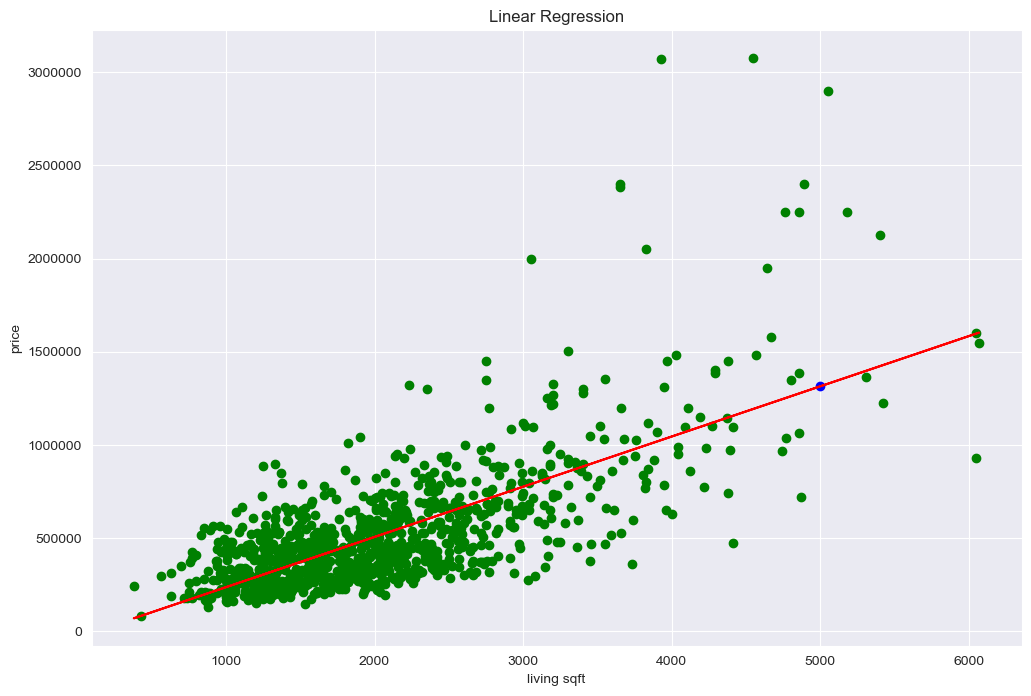

Model weights: [269.46205468]
Model intercept: -32304.654721028463
Model score: 0.49671


In [14]:
#b)
fig, ax = plt.subplots(figsize=(12,8))
# Plot data
plt.scatter(X, y, color='green')
plt.xlabel('living sqft')
plt.ylabel('price')
plt.title('Linear Regression')

# prevent scientific notation
ax.ticklabel_format(style='plain')

# model function
plt.plot(X, model.predict(X), color='red')

# Model intercept definition: In all linear regression models, the intercept has the same definition: the mean of the response, Y, when all predictors, all X = 0.
# So basically in context of linear model: y = w0 + w1 * x; it is w0
plt.scatter(5000, 5000 * model.coef_ + model.intercept_, color='blue')
plt.show()

print(f'Model weights: {model.coef_}')
print(f'Model intercept: {model.intercept_}')
print(f'Model score: {model.score(X, y).round(5)}')

# model.score() calculates score = 1 - (u / v)
# where: u = ((y_test - y_predicted) ** 2).sum(),
# v = ((y_test - y_test_mean()) ** 2).sum()
# So it tells us how accurate the regression line is compared to the mean

In [66]:
sum = 0
yp = model.predict(X)
for i in range(len(X)):
    sum += (y[i] - yp[i])
    
    
print(sum)

4.9622030928730965e-08


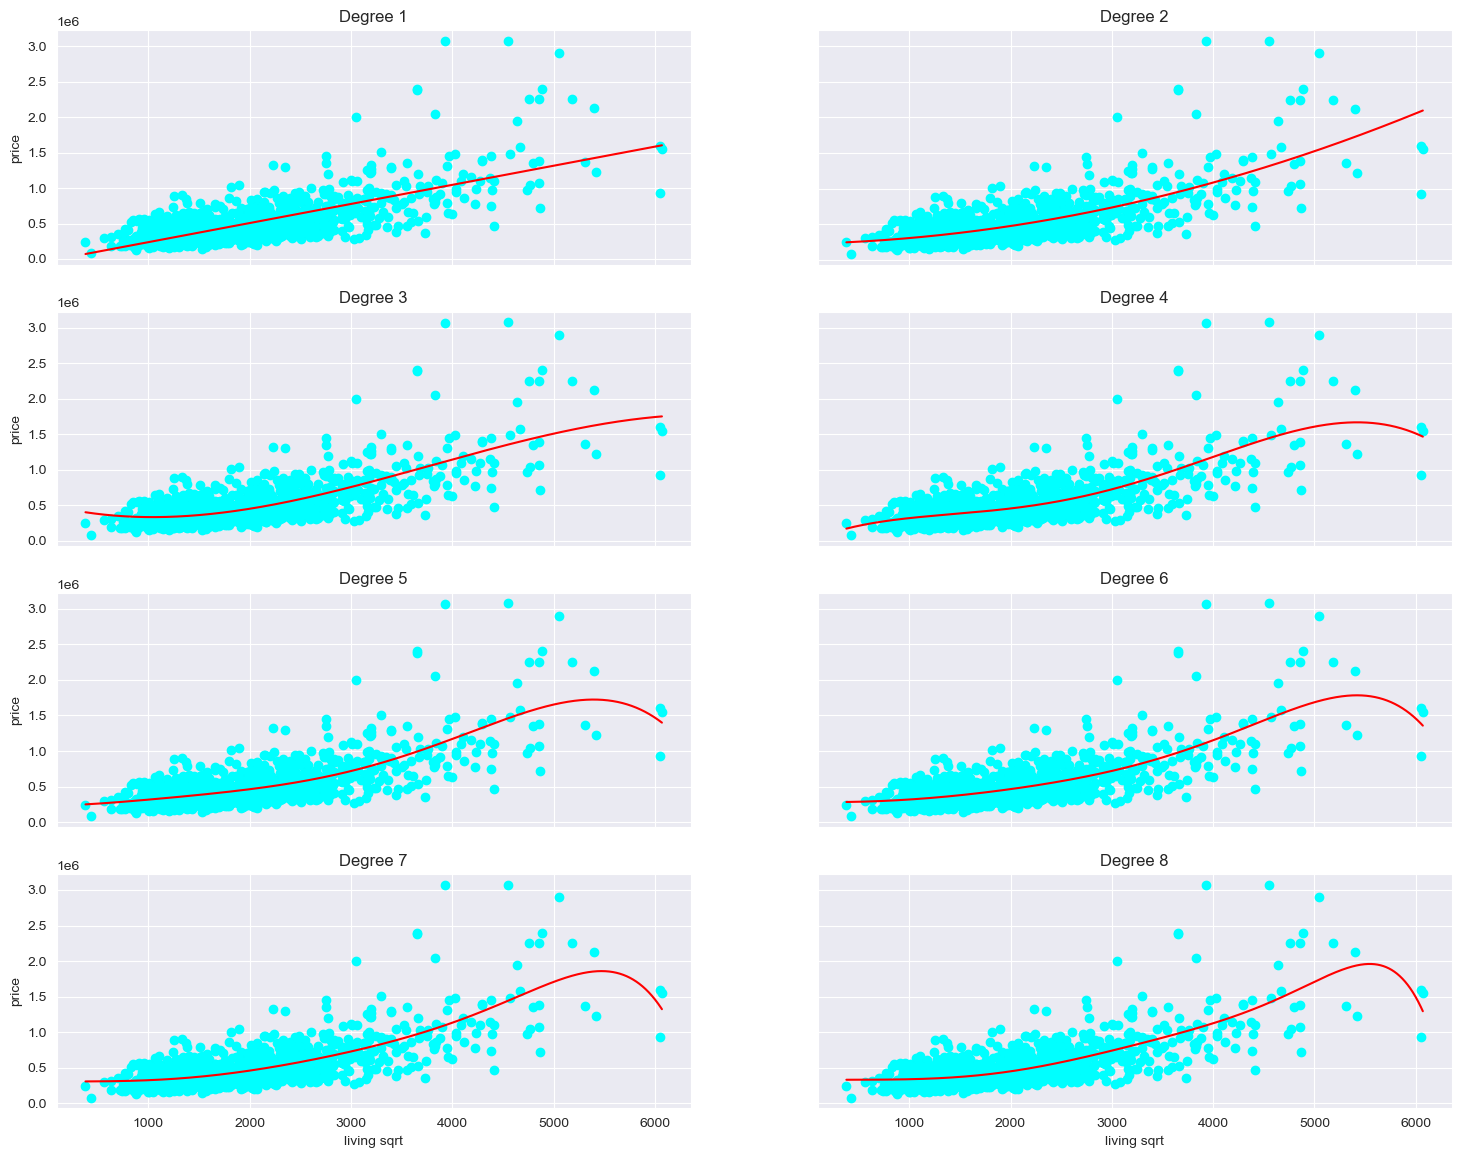

In [15]:
#c)
model = LinearRegression()
scores = []
errors = []

x_curve = np.linspace(min(X), max(X), 5000)

fig, ax = plt.subplots(figsize=(18,14), nrows=4, ncols=2)
row, col = 0, 0

for order in range(1,9):
    
    poly = PolynomialFeatures(degree=order, include_bias = False)
    X_order = poly.fit_transform(X)
    model.fit(X_order, y)

    poly_features = poly.transform(x_curve)
    
    ax[row, col].set_title(f'Degree {order}')    
    ax[row, col].scatter(X, y, color='cyan')
    ax[row, col].plot(x_curve, model.predict(poly_features), c='red')
    
    scores.append(model.score(poly.transform(X), y))
    errors.append(mean_squared_error(y, model.predict(X_order)))
    
    if col == 1:
        row += 1
    col = (col + 1) % 2
    
    
for a in ax.flat:
    a.set(xlabel='living sqrt', ylabel='price')
    a.label_outer()
    
plt.show()


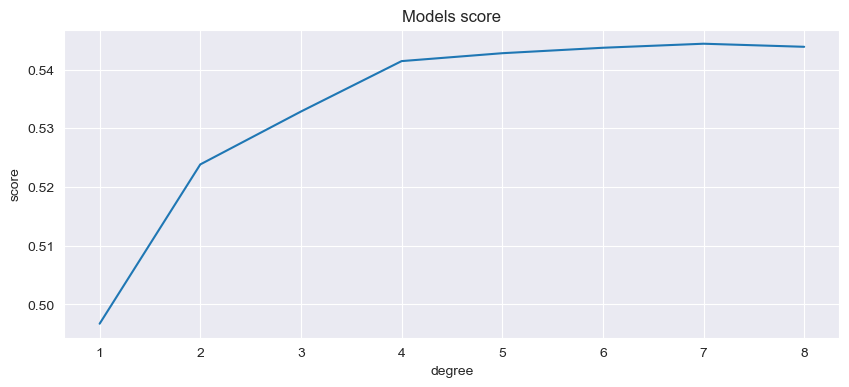

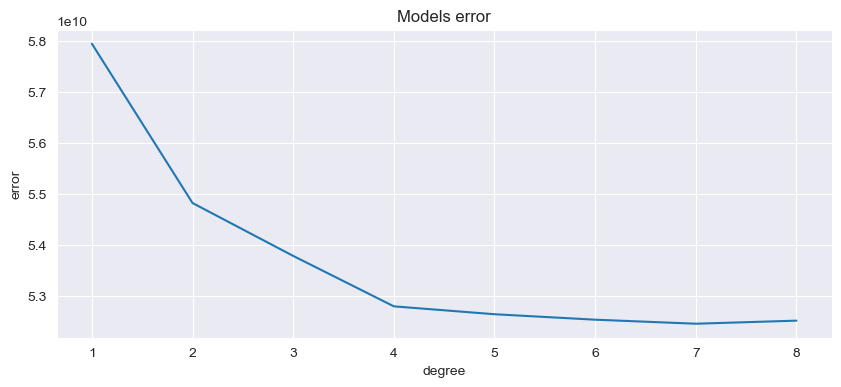

In [16]:
# Models performance
fig, ax = plt.subplots(figsize=[10,4])
plt.plot(range(1,9), scores)
plt.title('Models score')
plt.ylabel('score')
plt.xlabel('degree')

plt.show()

# Models error
fig, ax = plt.subplots(figsize=[10,4])
plt.plot(range(1,9), errors)
plt.title('Models error')
plt.ylabel('error')
plt.xlabel('degree')

plt.show()

## Exercise 2
In reality, we are not given the full dataset, so we need to create models which are able to handle unknown data.  
a) Split your data into training sample and test sample and repeat exercise 1 c). Plot training and test errors for all models. 

In [17]:
#a)
train_errors = []
test_errors = []

# collect errors
for order in range(1,9):
    poly = PolynomialFeatures(degree=order, include_bias = False)
    X_order = poly.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_order, y, test_size=0.3, random_state=44)
    
    model.fit(X_train, y_train)
    train_errors.append(mean_squared_error(y_train, model.predict(X_train)))
    test_errors.append(mean_squared_error(y_test, model.predict(X_test)))
    

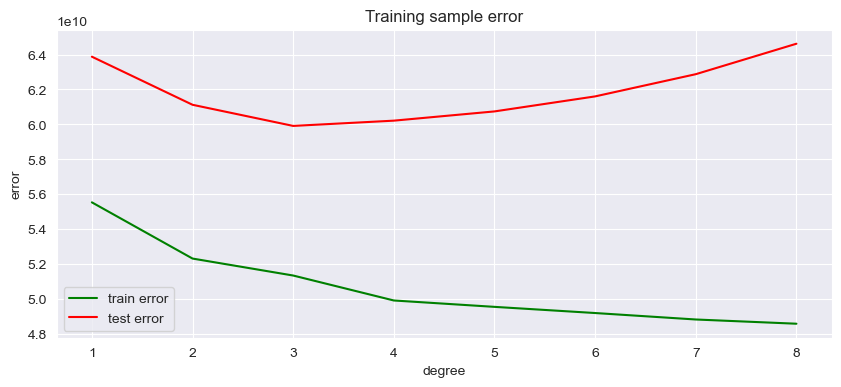

In [18]:
# Models performance
fig, ax = plt.subplots(figsize=[10,4])
plt.plot(range(1,9), train_errors, label= 'train error', c='green')
plt.plot(range(1,9), test_errors, label = 'test error', c='red')

plt.title('Training sample error')
plt.ylabel('error')
plt.xlabel('degree')

plt.legend()

plt.show()


## Exercise 3
a) Train model to predict sqft_living for a given house price. Plot predictions.  
b) Apply more features and propose better model for predicting house prices. Try to beat proposed one.

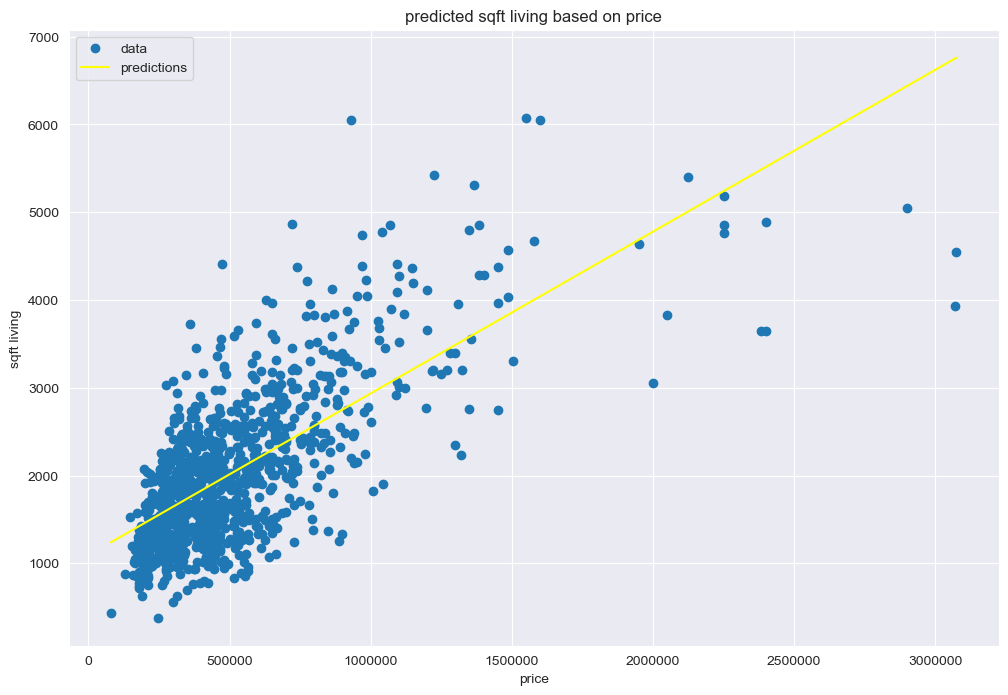

In [19]:
#a)

X = house_df.price.values.reshape(-1,1)[:1000]
y = house_df.sqft_living.values.reshape(-1)[:1000]

#Your code:
model = LinearRegression()
model.fit(X, y)

fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(X, y, label='data')
plt.xlabel('price')
plt.ylabel('sqft living')
plt.title('predicted sqft living based on price')
ax.ticklabel_format(style='plain')

x_curve = np.linspace(min(X), max(X), 5000)

plt.plot(x_curve, model.predict(x_curve), c='yellow', label='predictions')
plt.legend()
plt.show()

In [27]:
def test_model(features, degree, test_size=0.5):
    X = house_df[features].values.reshape(-1, len(features))
    y = house_df.price.values.reshape(-1)

    poly = PolynomialFeatures(degree, include_bias = False)
    X = poly.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=43)

    model = LinearRegression()
    
    _= model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    score = model.score(X_test, y_test)
    
    # print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))
    # print(f'Model score: {score.round(5)}')
    
    return score, mean_squared_error(y_pred, y_test)
    
def test_best_degree(features, test_size=0.5, mini=1, maxi=6):
    best_score = 0
    best_score_degree = 1
    besrt_score_error = 0
    for i in range(mini, maxi):
        score, error = test_model(features, i, test_size)
        if score > best_score:
            best_score = score
            best_score_degree = i
            besrt_score_error = error
            
    return best_score_degree, best_score, besrt_score_error
        
        
    

In [34]:
#b) Let's propose model, which uses living sqft, lot sqft, grade, view and all of their interactions up to third degree
# Proposed Model:
features = ['sqft_living', 'sqft_lot', 'grade', 'view']
score, error = test_model(features, 3, 0.5)
print(f'Model Score: {score}')
print(f'Model Error: {error}')

Model Score: 0.6420294254869627
Model Error: 48749590917.385284


<Axes: >

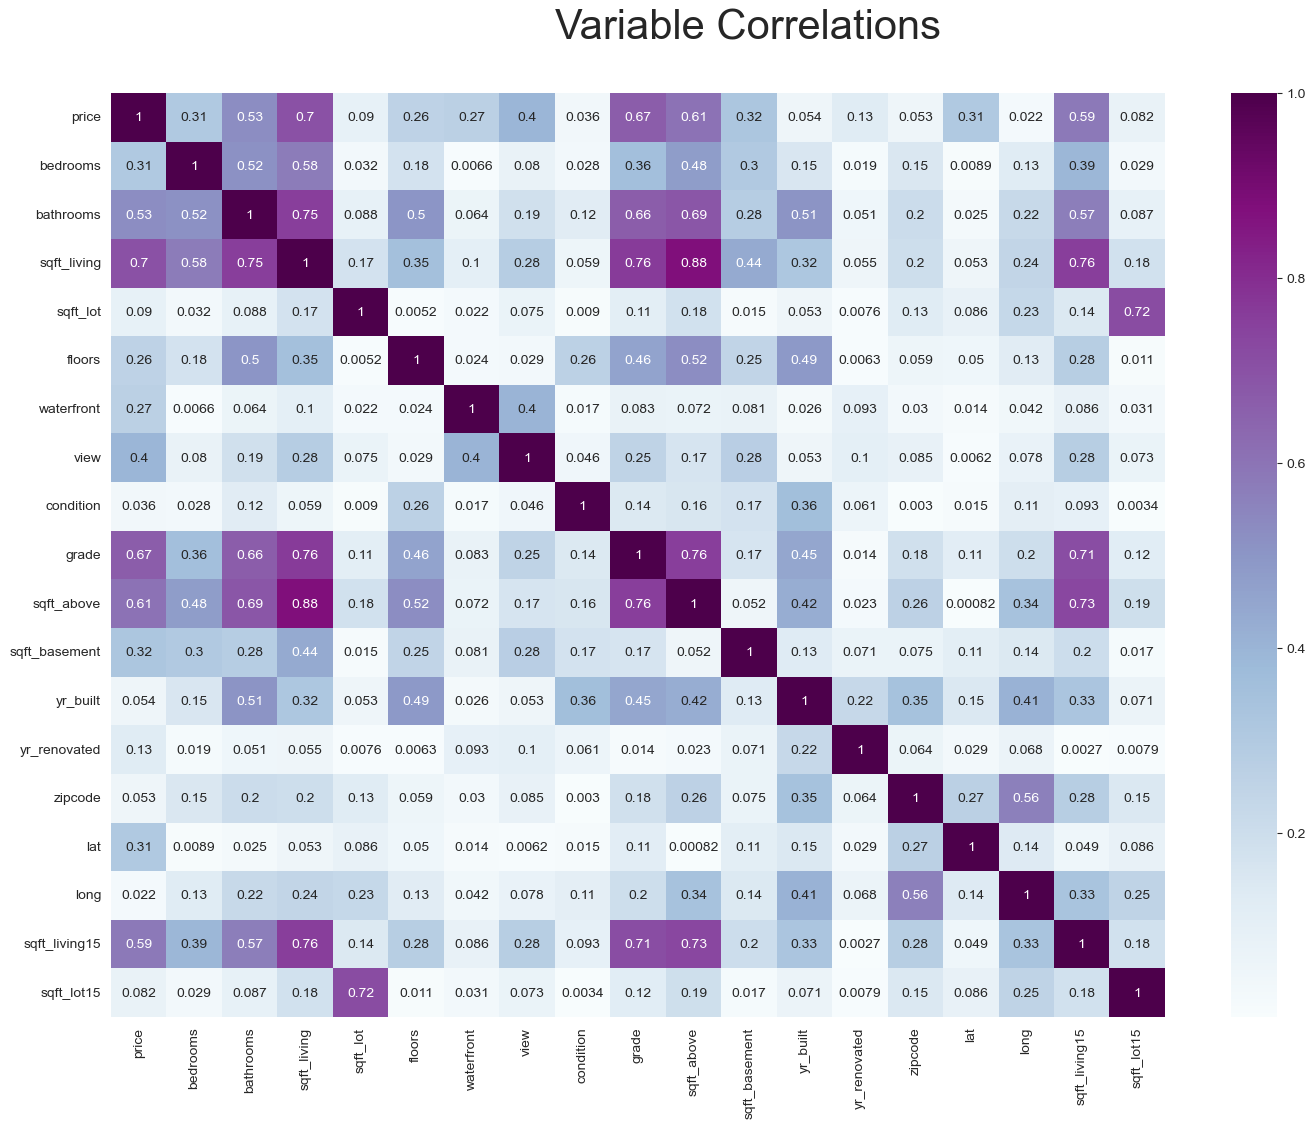

In [48]:
df = house_df.drop(columns='id')
df = df.drop(columns='date')
corr = df.corr().abs()
# print(df)

fig, ax=plt.subplots(figsize=(17,12))
fig.suptitle('Variable Correlations', fontsize=30, y=.95)
heatmap = sns.heatmap(corr, cmap='BuPu', annot=True)
heatmap

In [32]:
#Your model:
features = ['lat', 'long', 'sqft_living', 'bedrooms', 'condition']
degree, score, error = test_best_degree(features)
print(f'Model degree: {degree}')
print(f'Model Score: {score.round(5)}')
print(f'Model Error: {error}')

Model degree: 3
Model Score: 0.71583
Model Error: 38699357557.18697


In [31]:
features1 = ['lat', 'long', 'sqft_living', 'bedrooms', 'condition', 'sqft_lot']
degree, score, error = test_best_degree(features1)
print(f'Model degree: {degree}')
print(f'Model Score: {score.round(5)}')
print(f'Model Error: {error}')

Model degree: 2
Model Score: 0.66873
Model Error: 45113543967.82535


In [49]:
# THE BEST MODEL
features2 = ['lat', 'long', 'sqft_living', 'waterfront', 'grade']
degree, score, error = test_best_degree(features2)
print(f'Model degree: {degree}')
print(f'Model Score: {score.round(5)}')
print(f'Model Error: {error}')

Model degree: 3
Model Score: 0.78694
Model Error: 29015335492.712917


In [29]:
features3 = ['sqft_living', 'grade', 'bathrooms', 'sqft_living15']
degree, score, error = test_best_degree(features3)
print(f'Model degree: {degree}')
print(f'Model Score: {score.round(5)}')
print(f'Model Error: {error}')

Model degree: 2
Model Score: 0.58864
Model Error: 56020810102.96799


In [30]:
features4 = ['sqft_living', 'grade', 'view', 'sqft_above']
degree, score, error = test_best_degree(features4)
print(f'Model degree: {degree}')
print(f'Model Score: {score.round(5)}')
print(f'Model Error: {error}')

Model degree: 3
Model Score: 0.63495
Model Error: 49713980028.403145
